In [17]:
import csv
import random
import matplotlib.pyplot as plt

#csv reader
def read_data(filename):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        data = list(reader)
    return [(float(row[0]), float(row[1])) for row in data]

In [18]:
#calculate the Euclidean / straight-line distance distance between two points
def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5

In [19]:
#calculate the total distance of a given order of points
def total_distance(points, order):
    total = 0
    for i in range(len(order) - 1):
        point1 = points[order[i]]
        point2 = points[order[i + 1]]
        total += euclidean_distance(point1, point2)
    return total


In [20]:
def late_acceptance_hill_climbing(points, alpha, max_iterations, max_acceptance):
    current_order = list(range(len(points)))
    best_order = current_order[:]
    best_distance = total_distance(points, current_order)

    acceptance_list = [best_distance] * max_acceptance

    iteration = 0
    while iteration < max_iterations:
        neighbors = []
        for i in range(len(points) - 1):
            for j in range(i + 1, len(points)):
                neighbor = current_order[:]
                neighbor[i:j + 1] = neighbor[i:j + 1][::-1] if random.random() < alpha else neighbor[i:j + 1]
                neighbors.append(neighbor)

        found_better = False
        for neighbor in neighbors:
            distance = total_distance(points, neighbor)
            if distance < best_distance:
                best_distance = distance
                best_order = neighbor
                found_better = True
                acceptance_list.append(distance)

        if not found_better and acceptance_list:
            acceptance_list.pop(0)

        current_order = best_order[:]

        iteration += 1

    return best_order



In [21]:
#Run the algorithm multiple times and return the best orders
def run_algorithm(points, num_runs, alpha, max_iterations, max_acceptance):
    best_orders = []
    for _ in range(num_runs):
        random.shuffle(points)
        best_order = late_acceptance_hill_climbing(points, alpha, max_iterations, max_acceptance)
        best_orders.append(best_order)
    return best_orders



In [22]:
#Plot the TSP Solution

def plot_tsp(points, order):
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    plt.plot(x, y, 'bo-')
    for i in range(len(order) - 1):
        start = order[i]
        end = order[i + 1]
        plt.plot([points[start][0], points[end][0]], [points[start][1], points[end][1]], 'r-')
    plt.plot([points[order[-1]][0], points[order[0]][0]], [points[order[-1]][1], points[order[0]][1]], 'r-')
    plt.xlabel('X-coordinate')
    plt.ylabel('Y -coordinate')
    plt.title('TSP Solution')
    plt.show()

Run 1: Distance = 70.39884271801868
Run 2: Distance = 65.98359712130475
Run 3: Distance = 74.8213310993751
Run 4: Distance = 85.06001262285606
Run 5: Distance = 74.6224546517393
Run 6: Distance = 67.90773730730008
Run 7: Distance = 66.60597716301103
Run 8: Distance = 77.33003166982066
Run 9: Distance = 68.66705734183984
Run 10: Distance = 18.13875354082491


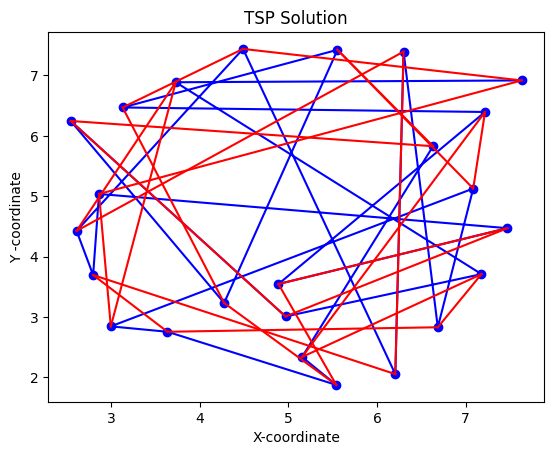

In [23]:
#main function

if __name__ == '__main__':
     # Define the input filename and number of runs
    filename = 'TSPMatrix.csv'
    # Read the data from the csv file
    points = read_data(filename)
    num_runs = 10
    alpha = 0.5  # Set the desired value for alpha
    max_iterations = 1000  # Set the desired maximum number of iterations
    max_acceptance = 100  # Set the desired maximum acceptance size
    # Run the algorithm and get the best orders
    best_orders = run_algorithm(points, num_runs, alpha, max_iterations, max_acceptance)

    # Print the results for each run
    for i, order in enumerate(best_orders):
        distance = total_distance(points, order)
        print(f'Run {i + 1}: Distance = {distance}')

    # best_order = min(best_orders, key=lambda order: total_distance(points, order))
    plot_tsp(points, best_orders[0])  # Assuming you want to plot the first best order